In [1]:
from voc_data_loader import image_loader, voc_meta
%matplotlib inline

import matplotlib
import numpy
import matplotlib.pyplot as plt

In [2]:
loader = image_loader("./")
meta = voc_meta("./")

In [15]:
batch_size = 4
data, labels, boxes = loader.get_next_train_batch(batch_size)

In [12]:
print numpy.sum(labels[3])

7.0


1


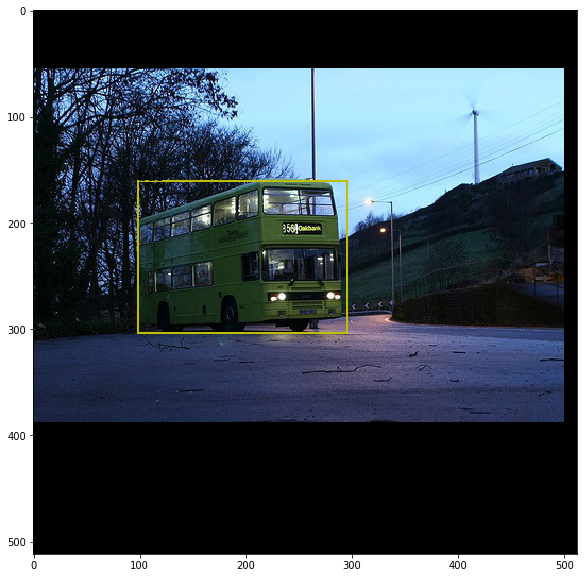

1


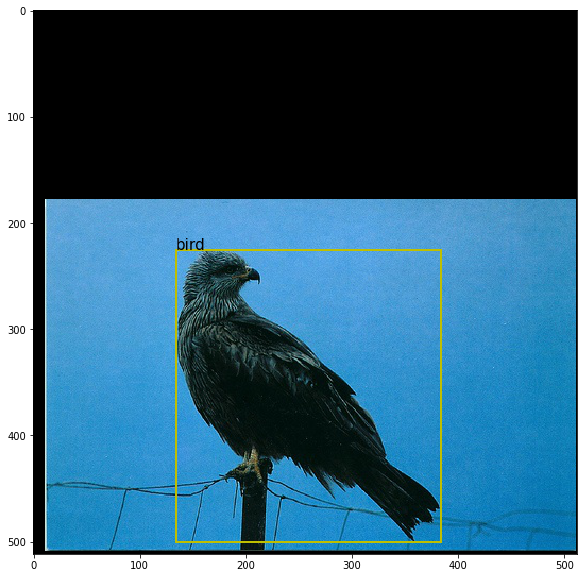

7


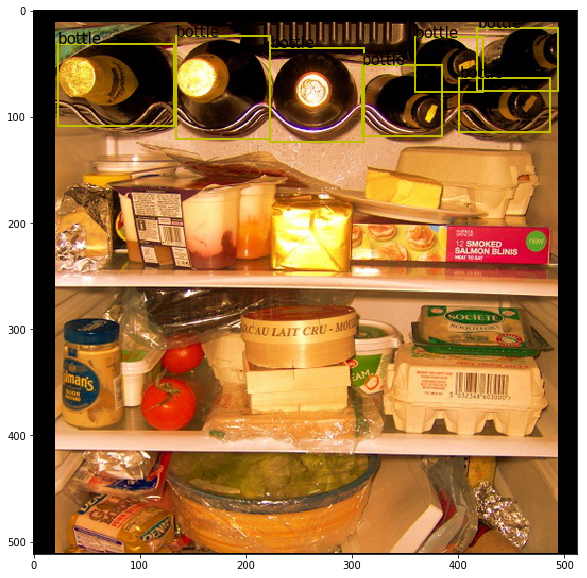

3


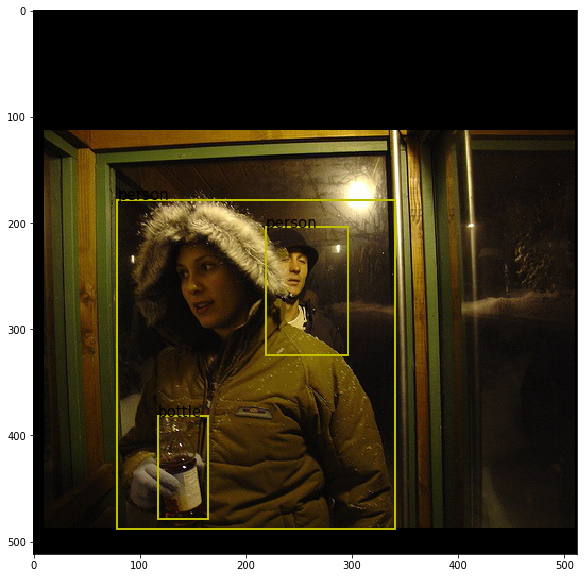

In [20]:
for i in range(batch_size):
    n_roi = int(numpy.sum(labels[i]))
    print n_roi
    fig,ax = plt.subplots(figsize=(10,10))
    plt.imshow(data[i])
    for box, label in zip(boxes[i, 0:n_roi], labels[i, 0:n_roi]):
        class_name = meta.class_name(numpy.argmax(label))
        rect = matplotlib.patches.Rectangle((box[0],box[1]),
                                            box[2] - box[0],
                                            box[3] - box[1],
                                            linewidth=2,
                                            edgecolor='y',
                                            facecolor='none')
        ax.text(box[0], box[1],class_name, fontsize=15)
        ax.add_patch(rect)
    plt.show()
